### Importing the Necessary Libraries

In [1]:
# The NLP module has been removed from PyCaret 3,
# so you'll have to install PyCaret version 2 to utilize it!
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from pycaret import nlp
from pycaret import classification
mpl.rcParams['figure.dpi'] = 300


### Loading the Dataset

In [2]:
data = pd.read_csv('bbc-text.csv')

data.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### Exploratory Data Analysis

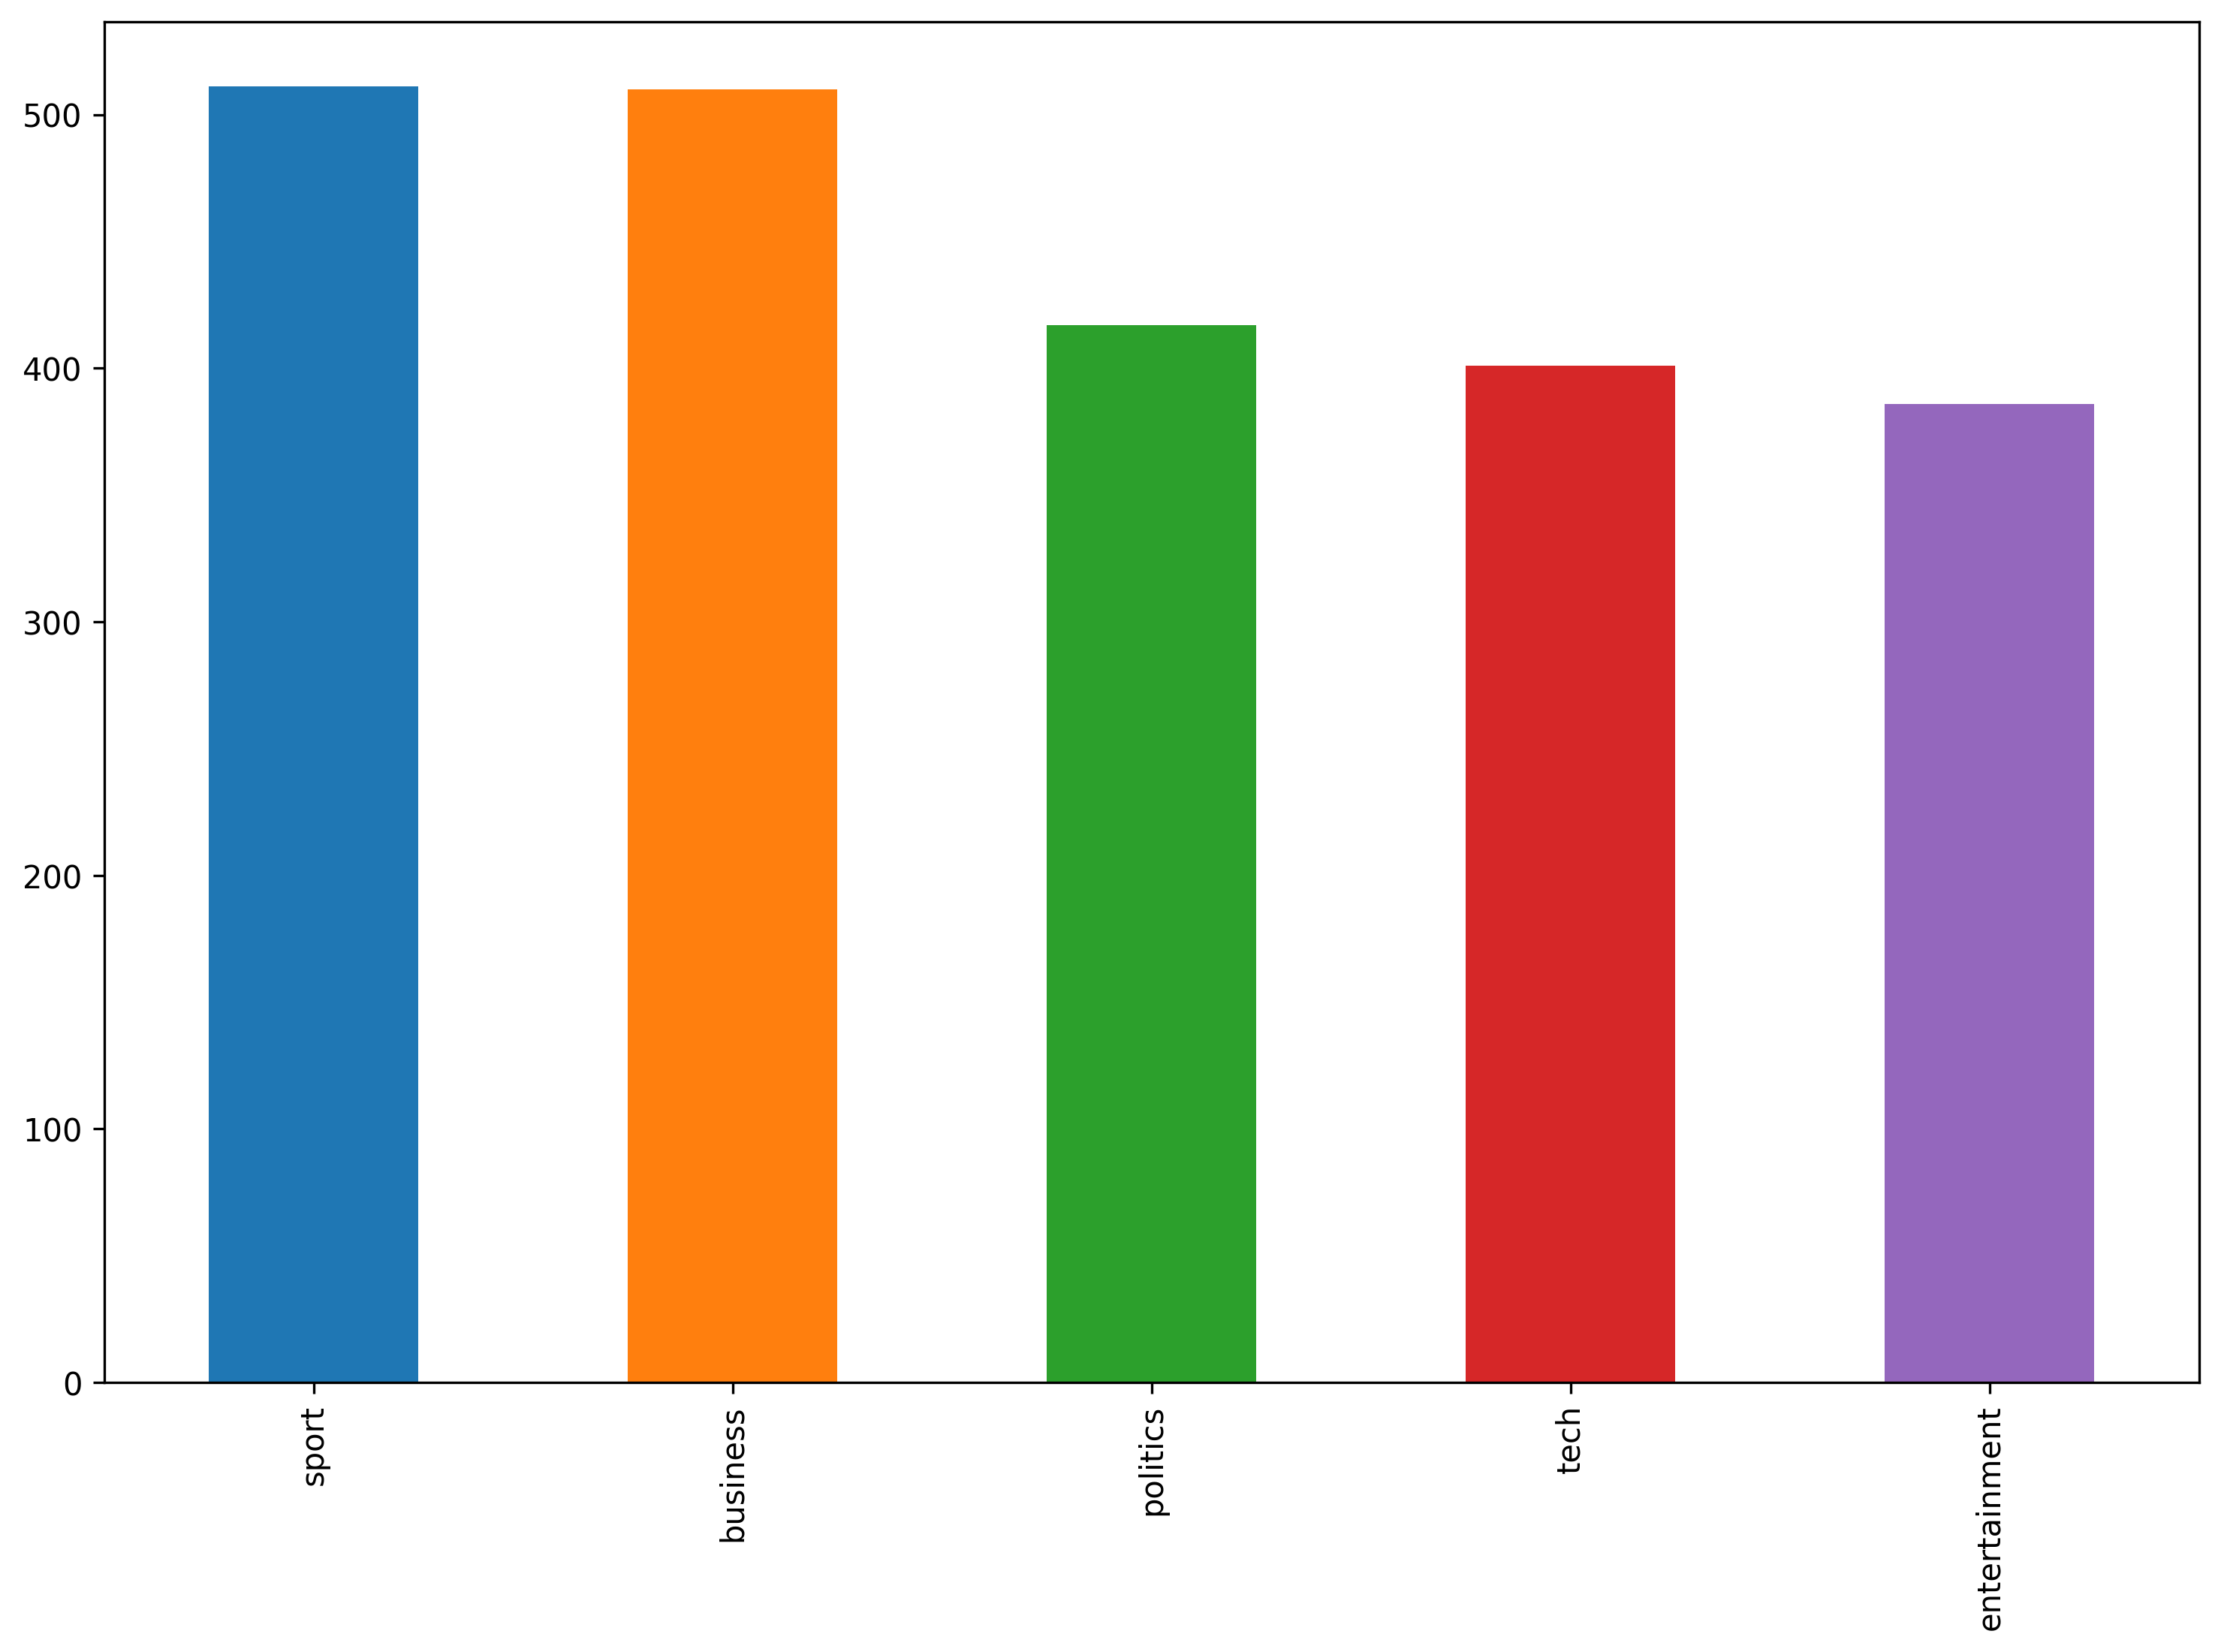

In [4]:
color = ['C0', 'C1', 'C2', 'C3', 'C4']

categories = data['category'].value_counts()
categories.plot(kind = 'bar', figsize = (12,8), color = color)

plt.show()

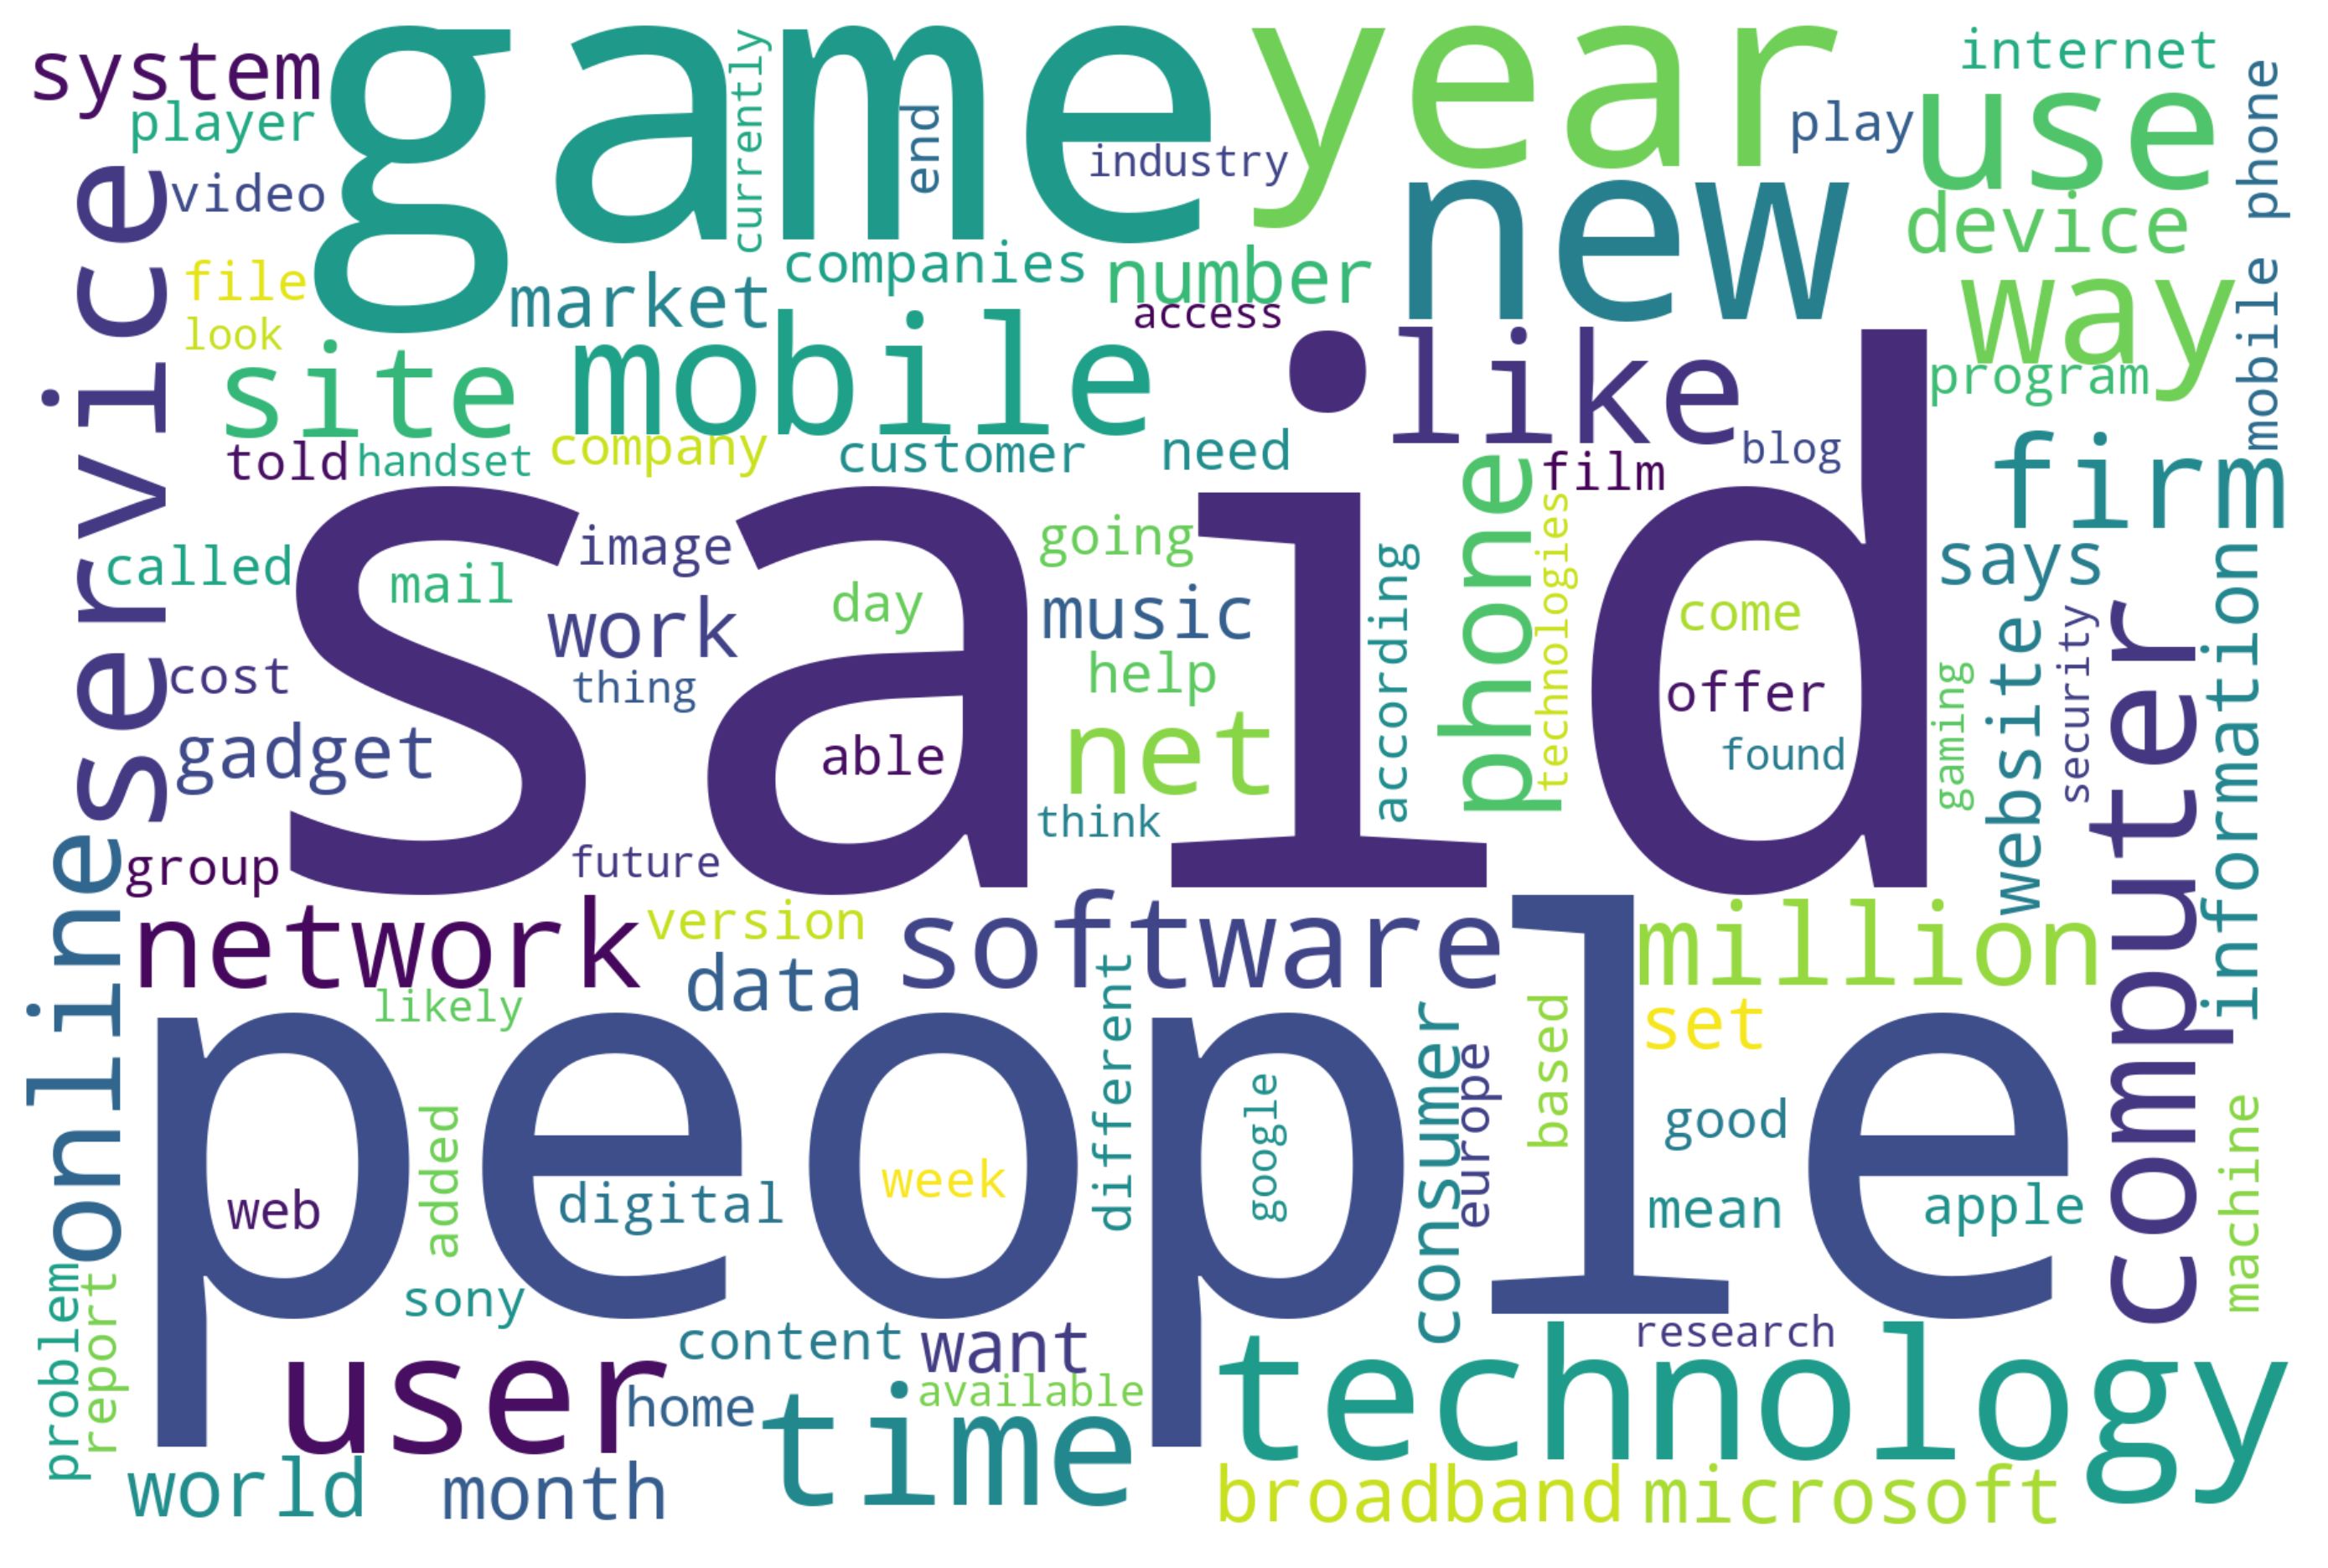

In [5]:
wc = WordCloud(width = 1800, height = 1200, stopwords = STOP_WORDS,
     background_color = 'white', min_word_length = 3, max_words = 100)

data_tech = data.query(" category == 'tech' ")['text']
text_tech = ' '.join(data_tech.to_list())
wc_img = wc.generate(text_tech)

plt.figure(figsize = (12,8))
plt.imshow(wc_img, interpolation = 'bilinear')
plt.axis("off")
plt.show()

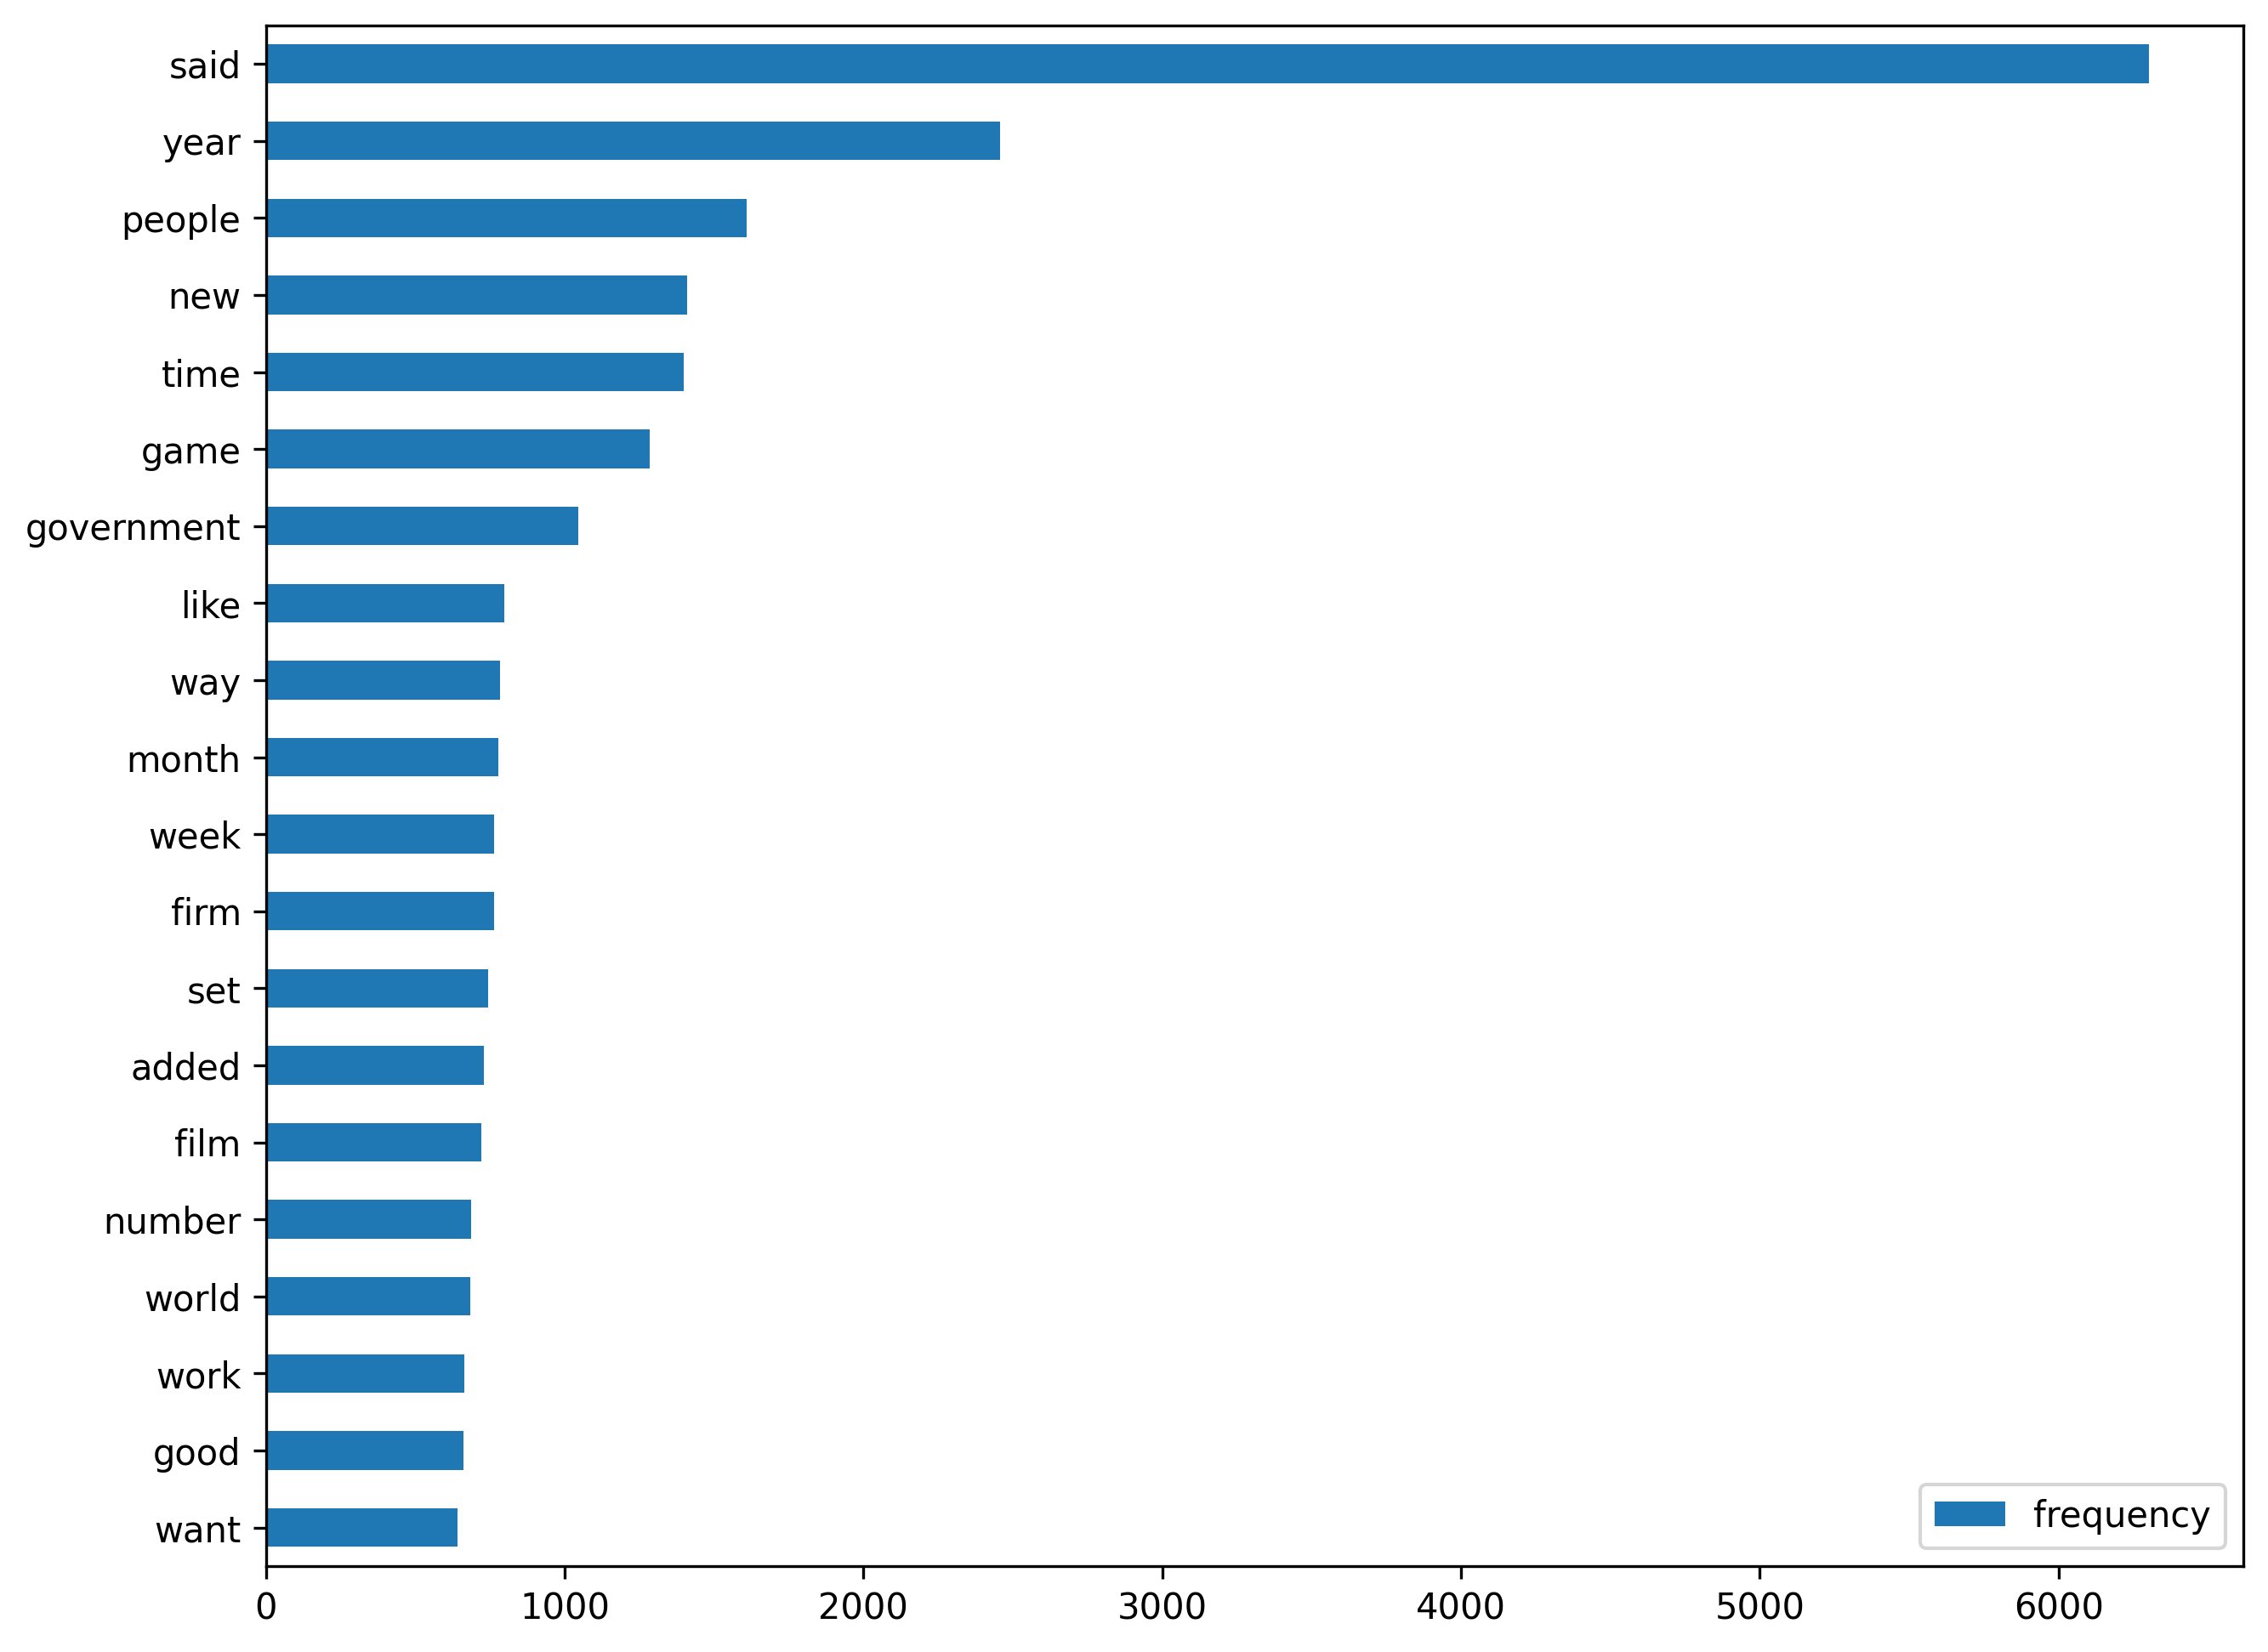

In [6]:
text = ' '.join(data['text'].to_list())
freq = wc.process_text(text)
df_freq = pd.DataFrame.from_dict(freq, orient='index', columns=['frequency'])
df_freq = df_freq.sort_values('frequency')
df_freq[-20:].plot(kind = 'barh', figsize = (10,8))

plt.show()

### Initializing the NLP Environment

In [7]:
nlp_ = nlp.setup(data = data, target='text', session_id = 6842)
data_ = nlp.get_config('data_')
data_.head(10)

Description,Value
session_id,6842
Documents,2225
Vocab Size,15625
Custom Stopwords,False


,category,text
0,tech,tv future hand viewer system plasma digital_vi...
1,business,leave book alone former accuse oversee fraud n...
2,sport,gamble leicester say rush make bid decide swit...
3,sport,yeade face premiership side leader yeade fa_cu...
4,entertainment,ocean_twelve raid ocean_twelve crime caper go ...
5,politics,hit back say claim act attack show rattle oppo...
6,politics,name likely name may election day parliament r...
7,sport,end third seed slump straight set defeat rain ...
8,sport,make return play injure take part full contact...
9,entertainment,last star_war child sixth final movie may suit...


### Creating and Assigning the Topic Model

In [31]:
cols = ['Topic_0','Topic_1','Topic_2',
        'Topic_3','Topic_4','category']

lda = nlp.create_model('lda', num_topics = 5)
data_assigned = nlp.assign_model(lda)
data_assigned_ = data_assigned[cols]

data_assigned_.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,category
0,0.060324,0.831212,0.063175,0.011273,0.034016,tech
1,0.115085,0.039387,0.001271,0.464457,0.379799,business
2,0.584945,0.004143,0.001588,0.002269,0.407055,sport
3,0.876524,0.004787,0.001918,0.002714,0.114057,sport
4,0.237407,0.005586,0.677938,0.047968,0.031100,entertainment
5,0.091791,0.001754,0.016693,0.000936,0.888826,politics
6,0.076346,0.003809,0.001508,0.002160,0.916178,politics
7,0.740604,0.005800,0.154086,0.003107,0.096402,sport
8,0.744063,0.009129,0.003764,0.005489,0.237555,sport
9,0.100310,0.004580,0.512188,0.002494,0.380428,entertainment


### Plotting the Topic Model

In [43]:
nlp.plot_model(model = lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.081379  0.169338       1        1  34.729850
1     -0.097756 -0.185512       2        1  24.971669
0     -0.259611  0.031456       3        1  21.216925
3      0.193827 -0.194324       4        1  11.748394
2      0.244919  0.179042       5        1   7.333163, topic_info=        Term         Freq        Total Category  logprob  loglift
389     film   937.000000   937.000000  Default  30.0000  30.0000
283     game  1288.000000  1288.000000  Default  29.0000  29.0000
184     year  2458.000000  2458.000000  Default  28.0000  28.0000
26   company   918.000000   918.000000  Default  27.0000  27.0000
626     sale   860.000000   860.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
445    child   115.484577   330.050552   Topic5  -5.3577   1.5627
352   number   131.535678   860.578794   Topic5  -5.2276   0.7344
239     make   145.443901  1986.080062   Topic5  -5.1270  -0.0014
584  british   112.690718   421.738870   Topic5  -5.3822   1.2930
692    first   120.812779  1177.045043   Topic5  -5.3126   0.3362

[345 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
956       5  0.992003    actor
6216      5  0.980881  actress
2         1  0.412140      add
2         2  0.160702      add
2         3  0.301726      add
...     ...       ...      ...
184       1  0.182636     year
184       2  0.150095     year
184       3  0.220059     year
184       4  0.338833     year
184       5  0.108199     year

[579 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])

### Initializing the Classification Environment

In [55]:
classf = classification.setup(data_assigned_, target = 'category',
         fix_imbalance = True, train_size = 0.8, session_id = 3100)

,Description,Value
0,session_id,3100
1,Target,category
2,Target Type,Multiclass
3,Label Encoded,"business: 0, entertainment: 1, politics: 2, sport: 3, tech: 4"
4,Original Data,"(2225, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Creating the Classification Model

In [51]:
catboost = classification.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8933,0.9871,0.8936,0.8943,0.8934,0.8661,0.8662
1,0.9607,0.9955,0.9603,0.9619,0.9609,0.9506,0.9508
2,0.9326,0.9951,0.9299,0.9371,0.9335,0.9154,0.9161
3,0.9157,0.9931,0.9185,0.9200,0.9154,0.8945,0.8957
4,0.9101,0.9906,0.9057,0.9151,0.9102,0.8871,0.8882
5,0.9213,0.9934,0.9236,0.9262,0.9218,0.9016,0.9025
6,0.8652,0.9833,0.8609,0.8808,0.8678,0.8304,0.8329
7,0.8933,0.9887,0.8938,0.8988,0.8946,0.8661,0.8668
8,0.9045,0.9889,0.8990,0.9050,0.9043,0.8801,0.8803
9,0.8820,0.9895,0.8887,0.8919,0.8815,0.8525,0.8553


### Finalizing and Saving the Models

In [52]:
catboost_final = classification.finalize_model(catboost)

nlp.save_model(lda, 'lda_model')
classification.save_model(catboost_final, 'catboost_model')

Model Succesfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='category',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='category')),
                 ('fix_perfect', Remove_100(target='category')),
                 ('clean_name